In [66]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import sklearn

In [67]:
np.random.seed(128)

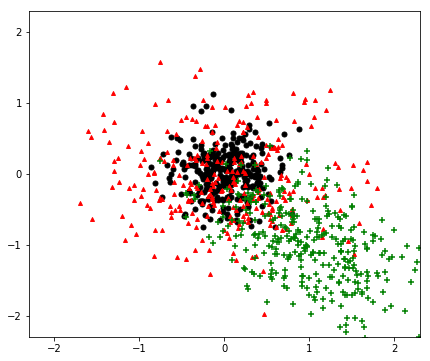

In [68]:
mu1 = [0, 0]
mu2 = [0, 0]
mu3 = [1, -1]
sigma1 = [[0.1, 0], [0, 0.1]]
sigma2 = [[0.5, 0], [0, 0.5]]
sigma3 = [[0.3, -0.15], [-0.15, 0.3]]
p1 = 1.0/3.0
p2 = 1.0/3.0
p3 = 1- p1 - p2

def gen_data(N, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2):
    y = np.random.choice([1, 2, 3], N, p=[p1, p2, 1 - p1 - p2])
    X = np.zeros((N,2))
    N1 = np.count_nonzero(y == 1)
    N2 = np.count_nonzero(y == 2)
    N3 = np.count_nonzero(y == 3)
    X[y==1, ] = np.random.multivariate_normal(mu1, sigma1, N1)
    X[y==2, ] = np.random.multivariate_normal(mu2, sigma2, N2)
    X[y==3, ] = np.random.multivariate_normal(mu3, sigma3, N3)
    return X, y

X, y = gen_data(900, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2)

fig, ax = plt.subplots()
plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=25)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=15)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=40)
fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

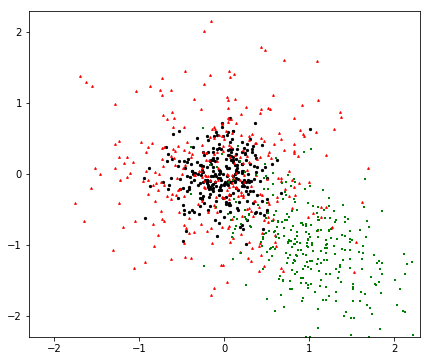

In [69]:
mu1 = [0, 0]
mu2 = [0, 0]
mu3 = [1, -1]
sigma1 = [[0.1, 0], [0, 0.1]]
sigma2 = [[0.5, 0], [0, 0.5]]
sigma3 = [[0.3, -0.15], [-0.15, 0.3]]
p1 = 1.0/3.0
p2 = 1.0/3.0
p3 = 1- p1 - p2

def gen_data(N, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2):
    y = np.random.choice([1, 2, 3], N, p=[p1, p2, 1 - p1 - p2])
    X = np.zeros((N,2))
    N1 = np.count_nonzero(y == 1)
    N2 = np.count_nonzero(y == 2)
    N3 = np.count_nonzero(y == 3)
    X[y==1, ] = np.random.multivariate_normal(mu1, sigma1, N1)
    X[y==2, ] = np.random.multivariate_normal(mu2, sigma2, N2)
    X[y==3, ] = np.random.multivariate_normal(mu3, sigma3, N3)
    return X, y

X, y = gen_data(900, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2)

fig, ax = plt.subplots()
plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=5)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=3)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=8)
fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

https://stackoverflow.com/questions/23204320/drawing-decision-boundary-of-two-multivariate-gaussian-in-python

https://stackoverflow.com/questions/19576761/drawing-decision-boundary-of-two-multivariate-gaussian

https://xavierbourretsicotte.github.io/Optimal_Bayes_Classifier.html

https://xavierbourretsicotte.github.io/LDA_QDA.html

https://stackoverflow.com/questions/11615664/multivariate-normal-density-in-python

https://www.geeksforgeeks.org/visualizing-the-bivariate-gaussian-distribution-in-python/

https://stackoverflow.com/questions/48639028/how-to-plot-decision-boundaries-between-3-classes-using-discriminant-functions

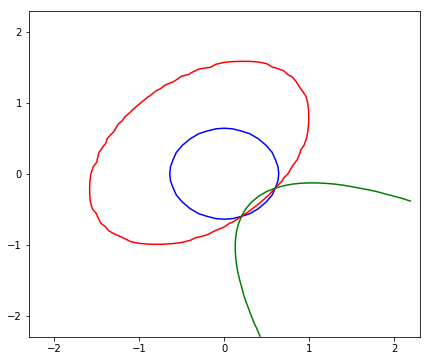

In [70]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

feature_x = np.arange(-2.3, 2.3, 0.1)
feature_y = np.arange(-2.3, 2.3, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)
Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
Z13 = decision_boudary(dist_1, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z13, [0], colors='red')
Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


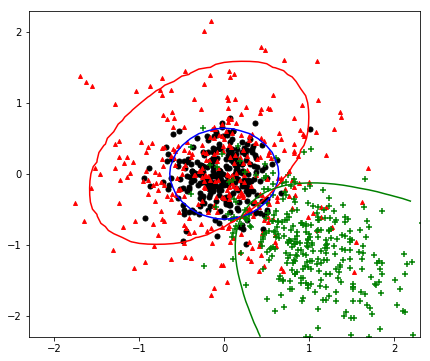

In [71]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

feature_x = np.arange(-2.3, 2.3, 0.1)
feature_y = np.arange(-2.3, 2.3, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)
plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=25)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=15)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=40)
Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
Z13 = decision_boudary(dist_1, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z13, [0], colors='red')
Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


In [72]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def compare_find_equals(number_a, number_b, number_c):
    if abs(number_a - number_b) / number_a <= 0.1 and abs(number_a - number_c) / number_a <= 0.1:
        print(number_a)
        return 1
    return 0
    
feature_x = np.arange(-2.3, 2.3, 0.1)
feature_y = np.arange(-2.3, 2.3, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)
matrix_a = np.vectorize(dist_1)(grid_X, grid_Y)
matrix_b = np.vectorize(dist_2)(grid_X, grid_Y)
matrix_c = np.vectorize(dist_3)(grid_X, grid_Y)
np.vectorize(compare_find_equals)(matrix_a, matrix_b, matrix_c)

0.21539279301848732
0.2153927930184836


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [73]:
def find_intersection_points(_px, _py, number_a):
    if dist_1(_px, _py) == number_a:
        print(_px, _py)
        return 1
    return 0

np.vectorize(find_intersection_points)(grid_X, grid_Y, 0.21539279301848246)
print("\n######\n")
np.vectorize(find_intersection_points)(grid_X, grid_Y, 0.21539279301849612)


######



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [74]:
p_intersection_1 = (0.2, -0.6)
p_intersection_2 = (0.6, -0.2)

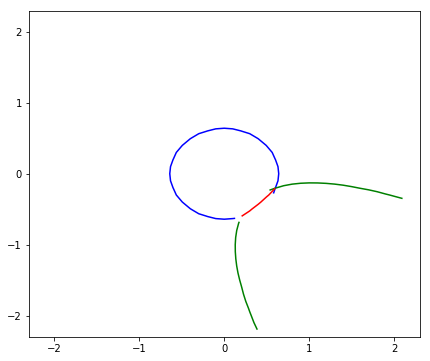

In [75]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

# https://matplotlib.org/2.0.2/examples/pylab_examples/contourf_demo.html
def cut_off_decision_boudary_within_rec(_grid_X, _grid_Y, matrix):
    def cut_within_rec(_px, _py, _element):
        if(0.2 < _px < 0.6 - 0.05 and -0.6 < _py < -0.2 - 0.05):
            return np.nan
        else:
            return _element
    return np.vectorize(cut_within_rec)(_grid_X, _grid_Y, matrix)
        
feature_x = np.arange(-2.2, 2.2, 0.1)
feature_y = np.arange(-2.2, 2.2, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)


feature_x_rec = np.arange(0.2, 0.61, 0.1)
feature_y_rec = np.arange(-0.6, -0.19, 0.1)
[grid_X_rec, grid_Y_rec] = np.meshgrid(feature_x_rec, feature_y_rec)

fig, ax = plt.subplots(1, 1)
_Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
Z12 = cut_off_decision_boudary_within_rec(grid_X, grid_Y, _Z12)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
_Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
Z23 = cut_off_decision_boudary_within_rec(grid_X, grid_Y, _Z23)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

Z13 = decision_boudary(dist_1, dist_3, grid_X_rec, grid_Y_rec)
ax.contour(grid_X_rec, grid_Y_rec, Z13, [0], colors='red')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


https://stackoverflow.com/questions/48639028/how-to-plot-decision-boundaries-between-3-classes-using-discriminant-functions

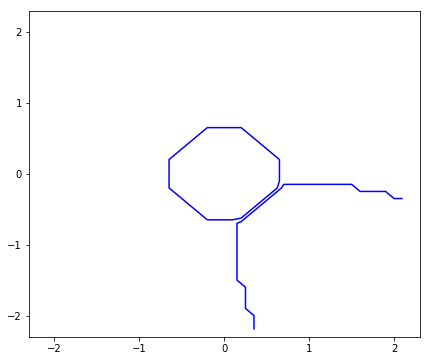

In [76]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

# https://stackoverflow.com/questions/48639028/
def compare_and_assign_value(number_a, number_b, number_c):
    z = np.array([number_a, number_b, number_c])
    return np.argmax(z) + 1
    
def decision_boudary(func_a, func_b, func_c, _grid_X, _grid_Y):
    matrix_a = np.vectorize(func_a)(_grid_X, _grid_Y)
    matrix_b = np.vectorize(func_b)(_grid_X, _grid_Y)
    matrix_c = np.vectorize(func_c)(_grid_X, _grid_Y)
    return np.vectorize(compare_and_assign_value)(matrix_a, matrix_b, matrix_c)
    

feature_x = np.arange(-2.2, 2.2, 0.1)
feature_y = np.arange(-2.2, 2.2, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)

Z_bayes = decision_boudary(dist_1, dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z_bayes, levels=[1.5, 2.5, 3.5], colors='b')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


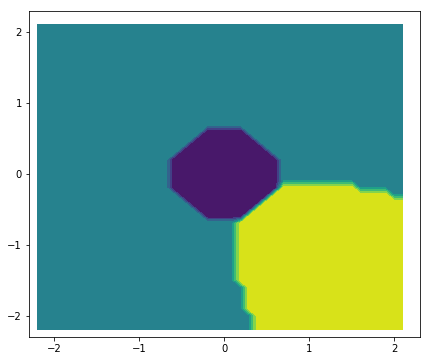

In [77]:
fig, ax = plt.subplots(1, 1)

ax.contourf(grid_X, grid_Y, Z_bayes)

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

We can't use dropout with sklearn's MLPClassifier.

https://datascience.stackexchange.com/questions/24275/scikit-mlpclassifier-vs-tensorflow-dnnclassifier

https://github.com/scikit-learn/scikit-learn/issues/6175

So we will use Keras instead.

In [78]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer, Dense, Dropout, \
                Activation, ActivityRegularization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import regularizers

In [79]:
import tensorflow as tf

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_train = scaler.transform(X)

In [81]:
y_train = to_categorical(y - 1, num_classes=3, dtype ="uint8")

In [82]:
(y - 1)[:10]

array([0, 2, 2, 0, 0, 1, 2, 2, 0, 1])

In [83]:
y[:10]

array([1, 3, 3, 1, 1, 2, 3, 3, 1, 2])

In [84]:
y_train[:10]

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [85]:
X_train.shape

(900, 2)

In [86]:
X_train

array([[-0.3527991 ,  1.53501216],
       [ 1.89743866, -0.5159167 ],
       [ 0.42153937, -0.39814873],
       ...,
       [ 1.05051083,  2.60601066],
       [-0.60275719,  1.1997626 ],
       [-0.23024213,  0.95960032]])

In [87]:
y_train

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [88]:
num_labels = len(np.unique(y))
num_labels

3

https://stats.stackexchange.com/questions/383310/what-is-the-difference-between-kernel-bias-and-activity-regulizers-and-when-t

https://keras.io/api/layers/regularizers/

https://stackoverflow.com/questions/44495698/keras-difference-between-kernel-and-activity-regularizers

https://stackoverflow.com/questions/50630849/how-does-tf-keras-layers-activityregularization-work-and-how-to-use-it-correct

In [89]:
model = keras.Sequential(
    [
        InputLayer(2),
        Dense(20, activation="relu"),
        Dropout(0.5),
        Dense(10, activation="relu", kernel_regularizer=regularizers.L2(0.5)),
        Dense(num_labels, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                60        
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [91]:
model.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [92]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Train loss:", score[0])
print("Train accuracy:", score[1])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Train loss: 0.6242777705192566
Train accuracy: 0.7244444489479065


In [93]:
feature_x = np.arange(-2.3, 2.3, 0.1)
feature_y = np.arange(-2.3, 2.3, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

list_class_result_x = [[], [], []]
list_class_result_y = [[], [], []]

def get_predict_result(_px, _py):
    which = np.argmax(model.predict(
        scaler.transform([[_px, _py]]))[0])
    list_class_result_x[which].append(_px)
    list_class_result_y[which].append(_py)
    return which + 1

Z_neural_network = np.vectorize(get_predict_result)(grid_X, grid_Y)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


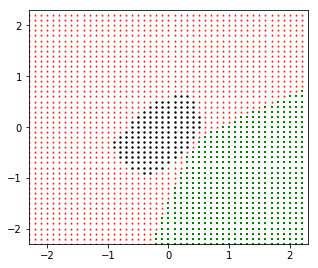

In [94]:
fig, ax = plt.subplots()
plt.scatter(np.array(list_class_result_x[0]), 
            np.array(list_class_result_y[0]), c='k', marker='o', s=2)
plt.scatter(np.array(list_class_result_x[1]), 
            np.array(list_class_result_y[1]), c='r', marker='^', s=1)
plt.scatter(np.array(list_class_result_x[2]), 
            np.array(list_class_result_y[2]), c='g', marker='+', s=3)
fig.set_size_inches(5, 4.3)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

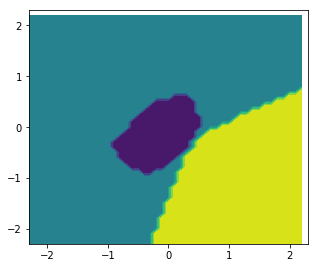

In [95]:
fig, ax = plt.subplots()

ax.contourf(grid_X, grid_Y, Z_neural_network)

fig.set_size_inches(5, 4.3)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

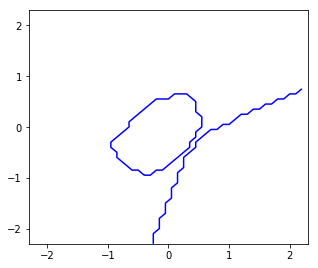

In [96]:
fig, ax = plt.subplots()

ax.contour(grid_X, grid_Y, Z_neural_network, levels=[1.5, 2.5, 3.5], colors='b')

fig.set_size_inches(5, 4.3)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

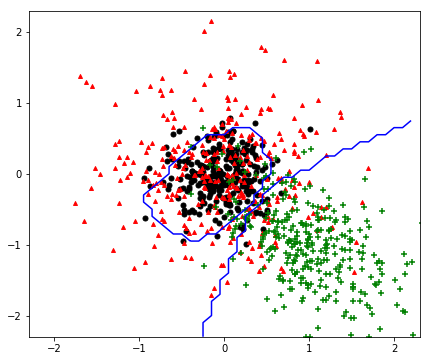

In [97]:
fig, ax = plt.subplots()

plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=25)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=15)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=40)

ax.contour(grid_X, grid_Y, Z_neural_network, levels=[1.5, 2.5, 3.5], colors='b')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

## Logistic Regression for Gaussian Data, which, of course, doesn't work

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
logregc = LogisticRegression(solver='lbfgs', max_iter=1000)

In [100]:
X_train

array([[-0.3527991 ,  1.53501216],
       [ 1.89743866, -0.5159167 ],
       [ 0.42153937, -0.39814873],
       ...,
       [ 1.05051083,  2.60601066],
       [-0.60275719,  1.1997626 ],
       [-0.23024213,  0.95960032]])

In [101]:
y_train

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [102]:
logregc.fit(X_train, y)

LogisticRegression(max_iter=1000)

In [103]:
yc_pred = logregc.predict(X_train)

In [104]:
logregc.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 1000,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'n_features_in_': 2,
 'classes_': array([1, 2, 3]),
 'coef_': array([[-0.72221533,  0.49257679],
        [-0.72196462,  0.61102126],
        [ 1.44417995, -1.10359805]]),
 'intercept_': array([ 0.12070734,  0.21254808, -0.33325542]),
 'n_iter_': array([11])}

In [105]:
perfc = sklearn.metrics.confusion_matrix(y, yc_pred)
print(perfc)
err_logregc = np.mean(y != yc_pred)
print(err_logregc)
print(1 - sum(np.diag(perfc)) / float(len(y)))
assert(np.round(err_logregc, 5) == 
       np.round(1 - sum(np.diag(perfc)) / float(len(y)), 5))

[[  1 261  10]
 [  9 251  55]
 [  1  43 269]]
0.4211111111111111
0.4211111111111111


https://scikit-learn.org/stable/modules/multiclass.html

In [106]:
from sklearn.multiclass import OneVsRestClassifier

In [107]:
logregd = OneVsRestClassifier(LogisticRegression())

logregd.fit(X_train, y)

OneVsRestClassifier(estimator=LogisticRegression())

In [108]:
yd_pred = logregd.predict(X_train)

In [109]:
perfd = sklearn.metrics.confusion_matrix(y, yd_pred)
print(perfd)
err_logregd = np.mean(y != yd_pred)
print(err_logregd)
print(1 - sum(np.diag(perfd)) / float(len(y)))
assert(np.round(err_logregd, 5) == 
       np.round(1 - sum(np.diag(perfd)) / float(len(y)), 5))

[[  0 257  15]
 [  5 249  61]
 [  0  29 284]]
0.4077777777777778
0.4077777777777778


https://www.kaggle.com/code/satishgunjal/multiclass-logistic-regression-using-sklearn/notebook

In [110]:
logrege = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=1000)

logrege.fit(X_train, y)

ye_pred = logrege.predict(X_train)

perfe = sklearn.metrics.confusion_matrix(y, ye_pred)
print(perfe)
err_logrege = np.mean(y != ye_pred)
print(err_logrege)
print(1 - sum(np.diag(perfe)) / float(len(y)))
assert(np.round(err_logrege, 5) ==
       np.round(1 - sum(np.diag(perfe)) / float(len(y)), 5))

[[  0 257  15]
 [  5 249  61]
 [  0  29 284]]
0.4077777777777778
0.4077777777777778


### Plot the Neural Network structure weights

In [111]:
from keras.utils.vis_utils import plot_model

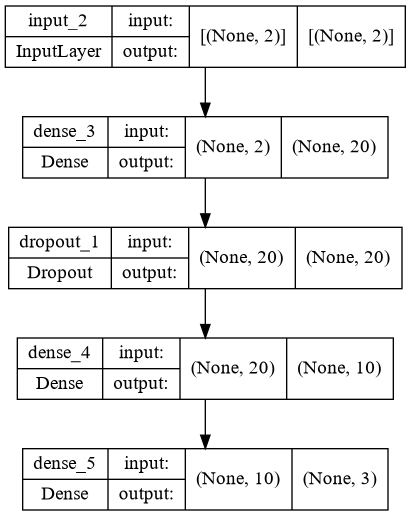

In [112]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [142]:
for layer in model.layers:
    print("\n\n////////////////////////////////////\n")
    print(layer.get_config())
    print("\n")
    print(layer.get_weights())




////////////////////////////////////

{'name': 'dense_3', 'trainable': True, 'dtype': 'float32', 'units': 20, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


[array([[-1.4449035 ,  1.7639805 , -2.4144502 , -2.0124578 ,  1.7998316 ,
         0.9512831 , -0.8437995 ,  1.5651423 ,  0.8759661 ,  2.711877  ,
         1.6600566 , -2.1429949 ,  1.7674117 ,  2.9836218 , -0.02110381,
         2.281209  , -1.4242854 , -1.925371  , -1.2148825 ,  1.1043942 ],
       [ 2.134819  ,  1.9762781 , -0.88452953, -0.5014936 , -1.5239989 ,
        -1.8616337 ,  1.5111864 , -1.4032806 , -2.0340288 , -0.3145054 ,
        -1.5122228 , -0.6578936 , -1.557792  ,  0.05169952,  2.0764425 ,
        -0.97385156,  1.9510587 ,  0.06073068,  1.7168845

In [143]:
model.layers[-1].get_weights()

[array([[-2.7975693 ,  0.7207323 ,  1.5617435 ],
        [-0.02553442, -0.15854113, -0.01013282],
        [ 0.88601637, -1.6787739 ,  0.65104717],
        [-1.8495603 ,  2.3055387 , -1.0167559 ],
        [ 1.6855814 ,  0.7947482 , -1.6808671 ],
        [ 0.2954686 ,  1.5461359 , -1.3082923 ],
        [-1.4322245 ,  1.5666175 ,  1.2148255 ],
        [-2.7484856 ,  0.9803304 ,  2.2114882 ],
        [-2.6266382 , -0.07111634,  1.3889186 ],
        [-0.19697796, -0.82331485,  1.5348704 ]], dtype=float32),
 array([ 0.1797515 ,  0.03405875, -0.23521627], dtype=float32)]

In [144]:
# prepare for Equation (38)

array_beta_0k_hat = model.layers[-1].get_weights()[1]
array_beta_0k_hat

array([ 0.1797515 ,  0.03405875, -0.23521627], dtype=float32)

In [145]:
# prepare for Equation (B.3)

array_beta_jk_hat = model.layers[-1].get_weights()[0]
array_beta_jk_hat

array([[-2.7975693 ,  0.7207323 ,  1.5617435 ],
       [-0.02553442, -0.15854113, -0.01013282],
       [ 0.88601637, -1.6787739 ,  0.65104717],
       [-1.8495603 ,  2.3055387 , -1.0167559 ],
       [ 1.6855814 ,  0.7947482 , -1.6808671 ],
       [ 0.2954686 ,  1.5461359 , -1.3082923 ],
       [-1.4322245 ,  1.5666175 ,  1.2148255 ],
       [-2.7484856 ,  0.9803304 ,  2.2114882 ],
       [-2.6266382 , -0.07111634,  1.3889186 ],
       [-0.19697796, -0.82331485,  1.5348704 ]], dtype=float32)

In [146]:
# Equation (38)

array_beta_0k_asterisk = array_beta_0k_hat - np.average(array_beta_0k_hat, axis=0)
array_beta_0k_asterisk

array([ 0.18688685,  0.04119409, -0.22808093], dtype=float32)

In [147]:
array_beta_0k_asterisk.shape

(3,)

In [148]:
# Equation (B.3)

array_beta_jk_asterisk = np.subtract(array_beta_jk_hat, np.average(array_beta_jk_hat, axis=1).reshape(10, 1))
array_beta_jk_asterisk

array([[-2.6258714 ,  0.8924301 ,  1.7334414 ],
       [ 0.0392017 , -0.09380501,  0.0546033 ],
       [ 0.93325317, -1.6315371 ,  0.698284  ],
       [-1.6626344 ,  2.4924645 , -0.8298301 ],
       [ 1.419094  ,  0.5282607 , -1.9473546 ],
       [ 0.11769786,  1.3683652 , -1.486063  ],
       [-1.881964  ,  1.116878  ,  0.76508605],
       [-2.8962634 ,  0.8325527 ,  2.0637105 ],
       [-2.1903596 ,  0.36516234,  1.8251973 ],
       [-0.36850384, -0.99484074,  1.3633446 ]], dtype=float32)

In [149]:
array_beta_jk_asterisk.transpose().shape

(3, 10)

In [150]:
# https://alasko.medium.com/convert-simple-neuron-network-to-mathematician-notation-58a0d72f0337

# Check if the final output of the Neural Network is OK.

def get_array_softmax_j(_model, _one_input):
    y_pred = _one_input.copy()
    for i in [0, 2, 3]: # Dropout layer should not be taken into consideration
        _layer = _model.layers[i]
        _W = _layer.get_weights()
        if i == 0:
            y_pred = y_pred @ _W[0] + _W[1]
        else:
            _relu = keras.activations.relu(tf.convert_to_tensor(y_pred), alpha=0.0, max_value=None, threshold=0.0).numpy()
            y_pred =  _relu @ _W[0] + _W[1]
    output = keras.activations.softmax(tf.convert_to_tensor(y_pred.reshape(-1, 1)), axis=0).numpy()
    return output

print(get_array_softmax_j(model,  np.array([0, 0])))
print(get_array_softmax_j(model,  np.array([0.1, 0.1])))
print(get_array_softmax_j(model,  np.array([-0.3, 0.3])))
print(get_array_softmax_j(model,  np.array([-2, 2])))
print(get_array_softmax_j(model,  np.array([2, -2])))

[[0.40115157]
 [0.35507586]
 [0.24377257]]
[[0.36040713]
 [0.36330224]
 [0.27629063]]
[[0.64586074]
 [0.28406091]
 [0.07007835]]
[[0.07680139]
 [0.92151095]
 [0.00168766]]
[[7.19893513e-08]
 [8.20975620e-03]
 [9.91790172e-01]]


In [151]:
# https://alasko.medium.com/convert-simple-neuron-network-to-mathematician-notation-58a0d72f0337
# https://stackoverflow.com/questions/46432325/dropout-setting-layer-weights-array-to-empty
# https://stackoverflow.com/questions/63738681/what-layers-are-affected-by-dropout-layer-in-tensorflow
# https://stackoverflow.com/questions/46134891/why-an-extra-comma-in-the-shape-of-a-single-index-numpy-array
# https://stackoverflow.com/questions/27570756/difference-between-these-array-shapes-in-numpy
# https://stackoverflow.com/questions/32722843/transform-an-array-of-shape-n-to-a-numpy-array-of-shape-n-1
# https://www.codingem.com/numpy-at-operator/

# calculate array_phi and array_mu, as described in the paragraph below Equation (35)

def get_array_phi_j(_model, _one_input):
    y_pred = _one_input.copy()
    for i in [0, 2]: # Dropout layer should not be taken into consideration
        _layer = _model.layers[i]
        _W = _layer.get_weights()
        if i == 0:
            y_pred = y_pred @ _W[0] + _W[1]
        else:
            _relu = keras.activations.relu(y_pred, alpha=0.0, max_value=None, threshold=0.0).numpy()
            y_pred =  _relu @ _W[0] + _W[1]
    return keras.activations.relu(y_pred, alpha=0.0, max_value=None, threshold=0.0).numpy()

def get_array_mu_j(_model, _array_input):
    list_of_array_phi = []
    for _one_input in _array_input:
        list_of_array_phi.append(get_array_phi_j(_model, _one_input))
    array_of_array_phi = np.array(list_of_array_phi)
    avg = np.average(array_of_array_phi, axis=0)
    return avg

print(get_array_phi_j(model, np.array([0, 0])))
print(get_array_phi_j(model, np.array([0, 0])).shape)
print(get_array_mu_j(model, np.array([[0, 0], [1, 1]])))
print(get_array_mu_j(model, np.array([[0, 0], [1, 1]])).shape)
print(get_array_mu_j(model, np.array([[0, 0], [1, 1]])).reshape(-1, 1))
print(get_array_mu_j(model, np.array([[0, 0], [1, 1]])).reshape(-1, 1).shape)
print(get_array_mu_j(model, X_train))

[0.16275434 0.         0.44601862 0.         0.7646808  0.21528311
 0.         0.20092222 0.17577182 0.30562617]
(10,)
[0.24309905 0.         0.38498337 0.06263924 0.74378571 0.23505937
 0.08962345 0.25163323 0.20484087 0.28410269]
(10,)
[[0.24309905]
 [0.        ]
 [0.38498337]
 [0.06263924]
 [0.74378571]
 [0.23505937]
 [0.08962345]
 [0.25163323]
 [0.20484087]
 [0.28410269]]
(10, 1)
[0.28583352 0.         0.35467152 0.09765027 0.69672929 0.26524884
 0.09994535 0.30117337 0.25745516 0.29161467]


In [161]:
# Equation (38)

def get_array_alpha_jk_asterisk(_model, _array_input):
    array_mu_j = get_array_mu_j(_model, _array_input).reshape(-1, 1)
    # https://stackoverflow.com/questions/47960938/how-to-replicate-a-row-of-an-array-with-numpy
    first_term_in_parentheses = array_beta_0k_asterisk.reshape(-1, 1)
    matrix_transformed_mu_j = np.repeat(array_mu_j, repeats = [10], axis=1)
    second_term_in_parentheses = matrix_transformed_mu_j @ array_beta_jk_asterisk
    first_term = np.repeat(first_term_in_parentheses, repeats = [10], axis=1).transpose() - second_term_in_parentheses
    second_term = matrix_transformed_mu_j @ array_beta_jk_asterisk
    return 1.0 / 10.0 * first_term - second_term # shape: (10, 3)

print(get_array_alpha_jk_asterisk(model, np.array([[0, 0], [1, 1]])))
print(get_array_alpha_jk_asterisk(model, np.array([[0, 0], [1, 1]])).shape)

[[ 2.45648229e+00 -1.29974815e+00 -1.15673421e+00]
 [ 1.86886847e-02  4.11940925e-03 -2.28080928e-02]
 [ 3.87929604e+00 -2.06074805e+00 -1.81854810e+00]
 [ 6.46834044e-01 -3.31847653e-01 -3.14986408e-01]
 [ 7.47736046e+00 -3.98519296e+00 -3.49216772e+00]
 [ 2.37586052e+00 -1.25662714e+00 -1.11923344e+00]
 [ 9.17431309e-01 -4.76578116e-01 -4.40853218e-01]
 [ 2.54206287e+00 -1.34552140e+00 -1.19654154e+00]
 [ 2.07282978e+00 -1.09454946e+00 -9.78280379e-01]
 [ 2.86766614e+00 -1.51967213e+00 -1.34799408e+00]]
(10, 3)


In [153]:
array_alpha_jk_asterisk = get_array_alpha_jk_asterisk(model, X_train)
print(array_alpha_jk_asterisk)

[[ 2.88502288e+00 -1.52895547e+00 -1.35606747e+00]
 [ 1.86886843e-02  4.11940925e-03 -2.28080936e-02]
 [ 3.57532931e+00 -1.89816975e+00 -1.67715967e+00]
 [ 9.97924151e-01 -5.19630169e-01 -4.78294020e-01]
 [ 7.00547942e+00 -3.73280476e+00 -3.27267491e+00]
 [ 2.67860002e+00 -1.41854905e+00 -1.26005103e+00]
 [ 1.02093913e+00 -5.31939855e-01 -4.88999307e-01]
 [ 3.03885070e+00 -1.61123115e+00 -1.42761964e+00]
 [ 2.60044517e+00 -1.37674750e+00 -1.22369774e+00]
 [ 2.94299620e+00 -1.55996286e+00 -1.38303345e+00]]


In [154]:
# Equation (25)

def get_array_w_jk(_model, px, py):
    array_phi_j = get_array_phi_j(_model, [px, py]).reshape(-1, 1)
    # https://stackoverflow.com/questions/47960938/how-to-replicate-a-row-of-an-array-with-numpy
    matrix_transformed_mu_j = np.repeat(array_phi_j, repeats = [10], axis=1)
    first_term = matrix_transformed_mu_j @ array_beta_jk_asterisk
    return first_term + array_alpha_jk_asterisk # shape: (10, 3)

print(get_array_w_jk(model, 0, 0))

[[ 1.40129737 -0.73537657 -0.66592081]
 [ 0.01868868  0.00411941 -0.02280809]
 [-0.49073245  0.27658615  0.21414631]
 [ 0.99792415 -0.51963017 -0.47829402]
 [ 0.03438175 -0.00427413 -0.03010766]
 [ 0.71600385 -0.3688435  -0.34716035]
 [ 1.02093913 -0.53193985 -0.48899931]
 [ 1.20717341 -0.6315483  -0.57562515]
 [ 0.99804779 -0.51969629 -0.47835153]
 [ 0.1568011  -0.06975081 -0.08705032]]


In [155]:
print(get_array_w_jk(model, 2, -2))

[[-6.55047997e+00  3.51767606e+00  3.03280412e+00]
 [ 1.86886843e-02  4.11940925e-03 -2.28080936e-02]
 [ 4.11670909e-01 -2.06069338e-01 -2.05601588e-01]
 [-1.78589819e+00  9.69312797e-01  8.16585434e-01]
 [ 7.00547942e+00 -3.73280476e+00 -3.27267491e+00]
 [ 2.67860002e+00 -1.41854905e+00 -1.26005103e+00]
 [-1.96679011e+00  1.06606386e+00  9.00726307e-01]
 [-8.15899277e+00  4.37799813e+00  3.78099487e+00]
 [-6.70418589e+00  3.59988653e+00  3.10429957e+00]
 [-2.90154861e+00  1.56602466e+00  1.33552401e+00]]


In [156]:
print(get_array_w_jk(model, -2, 2))

[[ 2.11882053e+00 -1.11914785e+00 -9.99672717e-01]
 [ 1.86886843e-02  4.11940925e-03 -2.28080936e-02]
 [ 3.32734476e+00 -1.76553382e+00 -1.56181104e+00]
 [-2.30479819e+00  1.24684937e+00  1.05794888e+00]
 [-2.76609801e+00  1.49357815e+00  1.27251990e+00]
 [-4.36743083e+00  2.35006000e+00  2.01737098e+00]
 [-1.67683013e+00  9.10977143e-01  7.65853039e-01]
 [ 3.03885070e+00 -1.61123115e+00 -1.42761964e+00]
 [ 2.60044517e+00 -1.37674750e+00 -1.22369774e+00]
 [ 2.94299620e+00 -1.55996286e+00 -1.38303345e+00]]


In [157]:
print(get_array_w_jk(model, 0.1, 0.1))

[[ 1.19646332 -0.62581993 -0.5706434 ]
 [ 0.01868868  0.00411941 -0.02280809]
 [-0.48396208  0.27296498  0.21099711]
 [ 0.99792415 -0.51963017 -0.47829402]
 [ 0.13875039 -0.06009628 -0.07865415]
 [ 0.7965343  -0.41191566 -0.38461864]
 [ 1.02093913 -0.53193985 -0.48899931]
 [ 1.12559787 -0.58791717 -0.53768074]
 [ 0.92991043 -0.48325264 -0.44665781]
 [ 0.11945212 -0.04977449 -0.06967765]]


In [158]:
print(get_array_w_jk(model, -0.3, 0.3))

[[ 1.93740055e+00 -1.02211436e+00 -9.15286225e-01]
 [ 1.86886843e-02  4.11940925e-03 -2.28080936e-02]
 [-8.36121086e-02  5.88355576e-02  2.47765485e-02]
 [ 9.97924151e-01 -5.19630169e-01 -4.78294020e-01]
 [-6.95014321e-01  3.85847438e-01  3.09166863e-01]
 [-3.38304453e-02  3.22095716e-02  1.62089715e-03]
 [ 1.02093913e+00 -5.31939855e-01 -4.88999307e-01]
 [ 2.26554612e+00 -1.19762487e+00 -1.06792132e+00]
 [ 1.87724035e+00 -9.89937353e-01 -8.87303048e-01]
 [ 7.49747749e-01 -3.86891642e-01 -3.62856150e-01]]


In [199]:
# Equation (31)

def get_m_theta_k(_model, _px, _py, which): # which = 0, 1, or 2
    _array_w_jk = get_array_w_jk(_model, _px, _py)
    _array_w_jk_pos = np.ma.masked_less(_array_w_jk, 0).filled(0)
    _array_w_jk_neg = np.ma.masked_greater(_array_w_jk, 0).filled(0)
    _array_w_jk_pos_sum = _array_w_jk_pos.sum(axis=0).tolist()
    _array_w_jk_neg_sum = _array_w_jk_neg.sum(axis=0).tolist()
    w_pos_all = _array_w_jk_pos_sum
    w_neg_all = _array_w_jk_neg_sum
    w_pos_which = _array_w_jk_pos_sum[which]
    w_neg_which = _array_w_jk_neg_sum[which]
    w_pos_others = _array_w_jk_pos_sum[0 : which] + _array_w_jk_pos_sum[which + 1 : ]
    w_neg_others = _array_w_jk_neg_sum[0 : which] + _array_w_jk_neg_sum[which + 1 : ]
    eta_pos = 1.0 / (np.sum(np.array(list(map(lambda wp: np.exp(wp), w_pos_all)))) - 3.0 + 1.0)
    eta_neg = 1.0 / (1.0 - np.prod(np.array(list(map(lambda wn: 1 - np.exp(-1 * wn), w_neg_all))), dtype="float32"))
    # Note: I changed the formula, which is now different from what's presented in the paper
    kappa = np.sum([eta_pos * (np.exp(wp) - 1) * (1 - eta_neg * np.exp(-1.0 * wn)) for (wp, wn) in list(zip(w_pos_all, w_neg_all))])
    eta = 1.0 / (1.0 - kappa)
    m_outer = eta * eta_pos * eta_neg * np.exp(-1 * w_neg_which)
    m_inner = np.exp(w_pos_which) - 1.0 + np.prod(np.array([1 - np.exp(-1 * wn) for wn in w_neg_others]), dtype="float32")
    m = m_outer * m_inner
    return m

get_m_theta_k(model, 0, 0, 0)

1.403990115436451

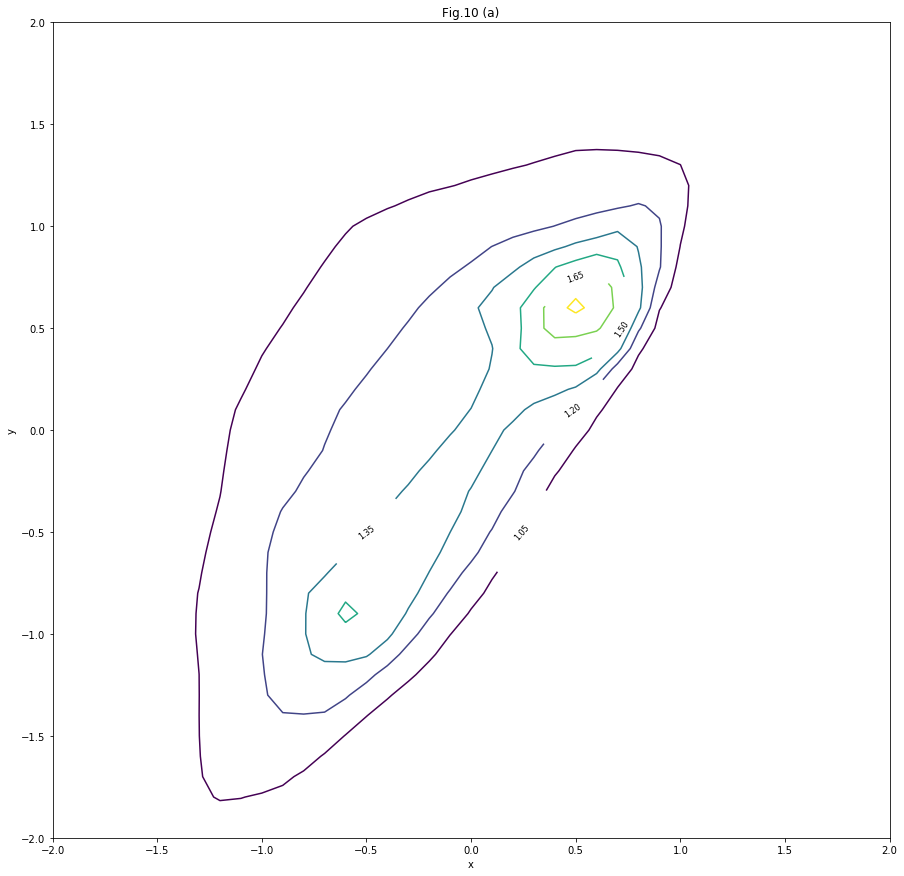

In [201]:
# Plot Figure 10 (a)

def get_m_theta_for_class_1(_px, _py):
    return get_m_theta_k(model, _px, _py, 0)

arr_x = np.arange(-2.0, 2.1, 0.1)
arr_y = np.arange(-2.0, 2.1, 0.1)

_X, _Y = np.meshgrid(arr_x, arr_y)
# https://stackoverflow.com/questions/61899911
Z = np.vectorize(get_m_theta_for_class_1)(_X, _Y)

fig, ax = plt.subplots()
ct = ax.contour(arr_x, arr_y, Z)
ax.clabel(ct, colors='k', fmt='%2.2f', fontsize=8)
ax.set_title('Fig.10 (a)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.set_size_inches(15, 15)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()


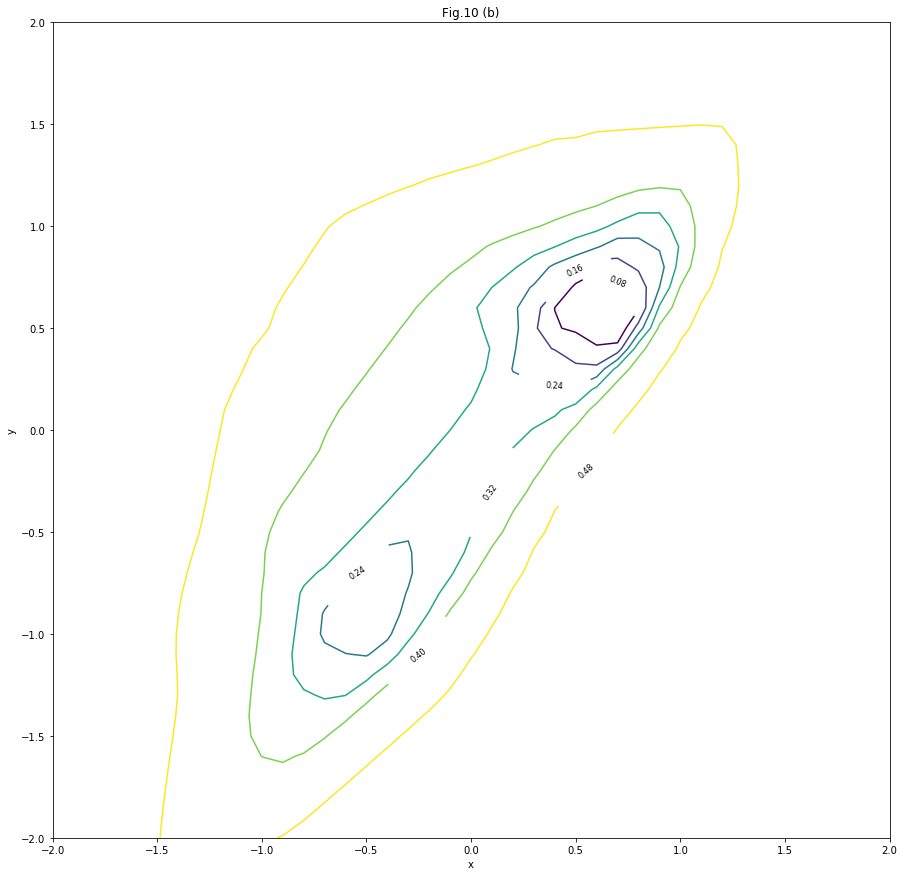

In [202]:
# Plot Figure 10 (a)

def get_m_theta_for_class_2(_px, _py):
    return get_m_theta_k(model, _px, _py, 1)

arr_x = np.arange(-2.0, 2.1, 0.1)
arr_y = np.arange(-2.0, 2.1, 0.1)

_X, _Y = np.meshgrid(arr_x, arr_y)
# https://stackoverflow.com/questions/61899911
Z = np.vectorize(get_m_theta_for_class_2)(_X, _Y)

fig, ax = plt.subplots()
ct = ax.contour(arr_x, arr_y, Z)
ax.clabel(ct, colors='k', fmt='%2.2f', fontsize=8)
ax.set_title('Fig.10 (b)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.set_size_inches(15, 15)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()


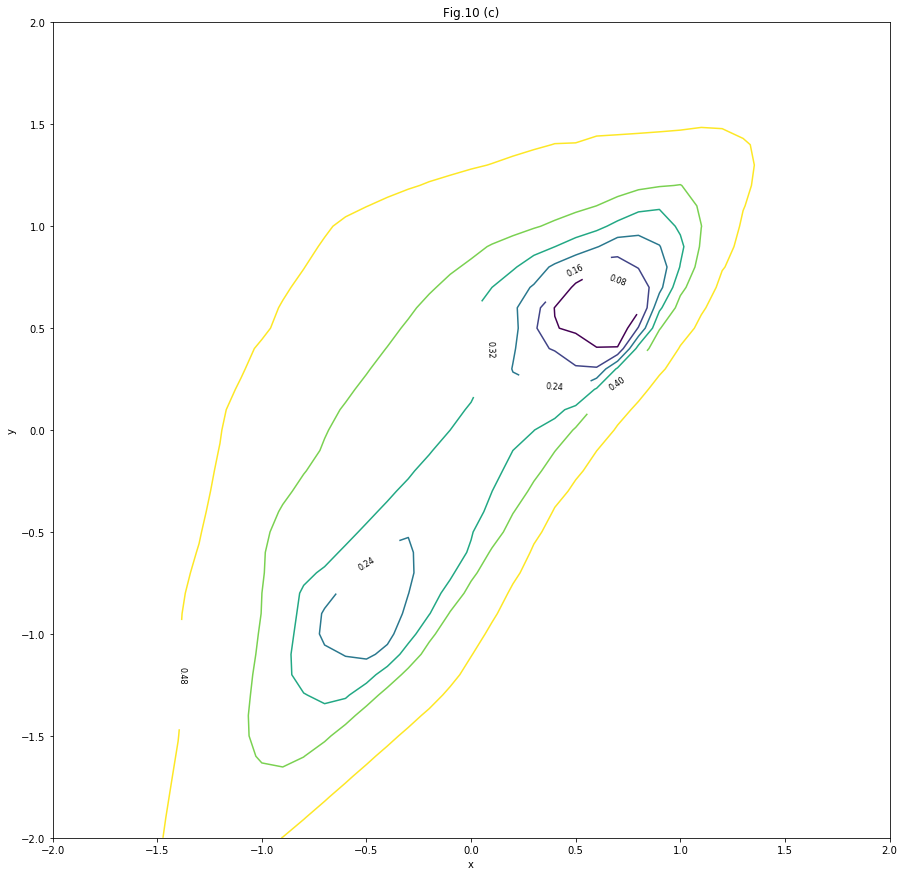

In [203]:
# Plot Figure 10 (a)

def get_m_theta_for_class_3(_px, _py):
    return get_m_theta_k(model, _px, _py, 2)

arr_x = np.arange(-2.0, 2.1, 0.1)
arr_y = np.arange(-2.0, 2.1, 0.1)

_X, _Y = np.meshgrid(arr_x, arr_y)
# https://stackoverflow.com/questions/61899911
Z = np.vectorize(get_m_theta_for_class_3)(_X, _Y)

fig, ax = plt.subplots()
ct = ax.contour(arr_x, arr_y, Z)
ax.clabel(ct, colors='k', fmt='%2.2f', fontsize=8)
ax.set_title('Fig.10 (c)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.set_size_inches(15, 15)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()
